# Getting started

In [1]:
import skimage

`skimage.data`: https://scikit-image.org/docs/stable/api/skimage.data.html#module-skimage.data

In [2]:
from skimage import data
I_camera = data.camera()

Within scikit-image, images are represented as NumPy arrays, for example 2-D arrays for grayscale 2-D images

In [3]:
type(I_camera)

numpy.ndarray

In [4]:
I_camera.shape

(512, 512)

In [5]:
cell = data.cell()

from skimage import filters
threshold_value = filters.threshold_otsu(cell)
threshold_value

122

Of course, it is also possible to load your own images as NumPy arrays from image files, using `skimage.io.imread()`:

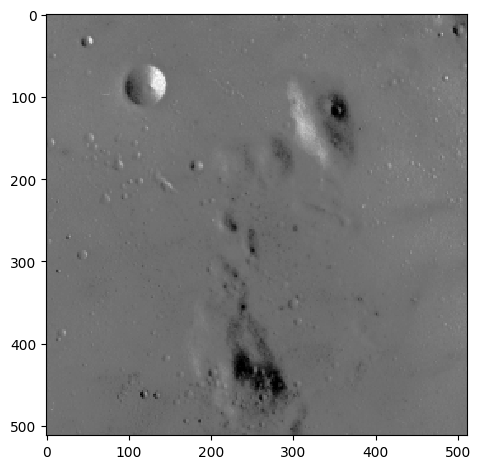

In [8]:
import os
filename = os.path.join(skimage.data_dir,'moon.png')
from skimage import io
moon = io.imread(filename)

io.imshow(moon)


# Using simple NumPy operations for manipulating images

This script illustrates how to use basic NumPy operations, such as slicing,
masking and fancy indexing, in order to modify the pixel values of an image.


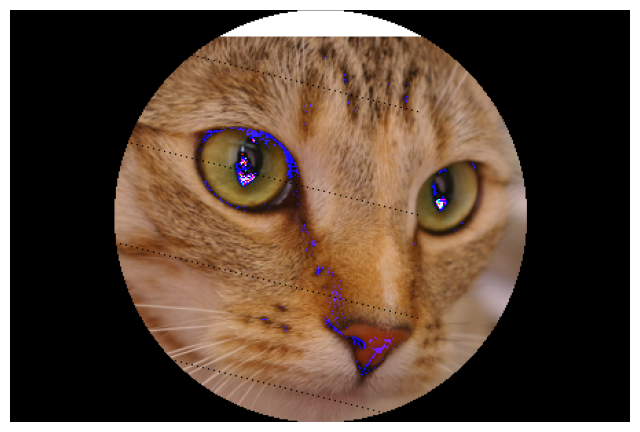

In [9]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

cat = data.cat()
cat[:20] = 0
mask = cat < 7
cat[mask] = 255
inds_x = np.arange(len(cat))
inds_y = (4 * inds_x) % len(cat)
cat[inds_x, inds_y] = 0

l_x, l_y = cat.shape[0], cat.shape[1]
X, Y = np.ogrid[:l_x, :l_y]
outer_disk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2
cat[outer_disk_mask] = 0

plt.figure(figsize=(8, 8))
plt.imshow(cat)
plt.axis('off')
plt.show()

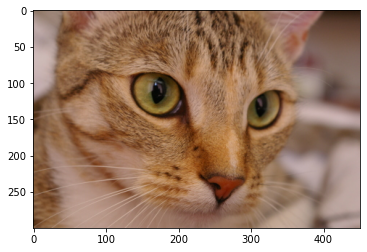

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

cat = data.cat()
plt.imshow(data.cat())


# RGB to grayscale

This example converts an image with RGB channels into an image with a single
grayscale channel.

The value of each grayscale pixel is calculated as the weighted sum of the
corresponding red, green and blue pixels as::

        Y = 0.2125 R + 0.7154 G + 0.0721 B

These weights are used by CRT phosphors as they better represent human
perception of red, green and blue than equal weights. [1]_

## References
 [1] http://poynton.ca/PDFs/ColorFAQ.pdf


<ipython-input-21-8e69c15ceb79>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


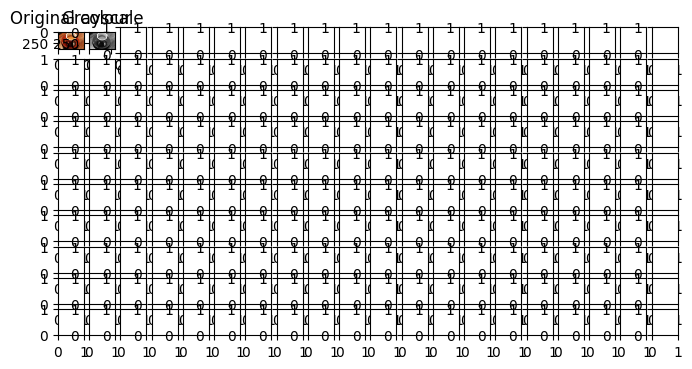

In [21]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.coffee()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(10, 20, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original colour")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()


# Canny edge detector

The Canny filter is a multi-stage edge detector. It uses a filter based on the
derivative of a Gaussian in order to compute the intensity of the gradients.The
Gaussian reduces the effect of noise present in the image. Then, potential
edges are thinned down to 1-pixel curves by removing non-maximum pixels of the
gradient magnitude. Finally, edge pixels are kept or removed using hysteresis
thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the
noisier the image, the greater the width), and the low and high threshold for
the hysteresis thresholding.


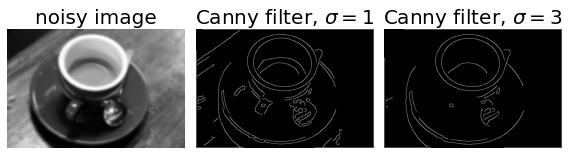

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


from skimage import data
image = data.coffee()
image = rgb2gray(image)


image = ndi.gaussian_filter(image, 3)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

Edge operators are used in image processing within edge detection algorithms. They are discrete differentiation operators, computing an approximation of the gradient of the image intensity function.

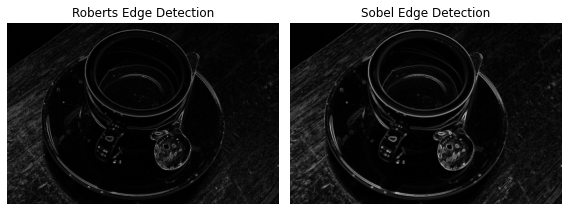

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import coffee
from skimage.util import compare_images


image = coffee()
image = rgb2gray(image)
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

# RAG Thresholding

This example constructs a Region Adjacency Graph (RAG) and merges regions which are similar in color. We construct a RAG and define edges as the difference in mean color. We then join regions with similar mean color.

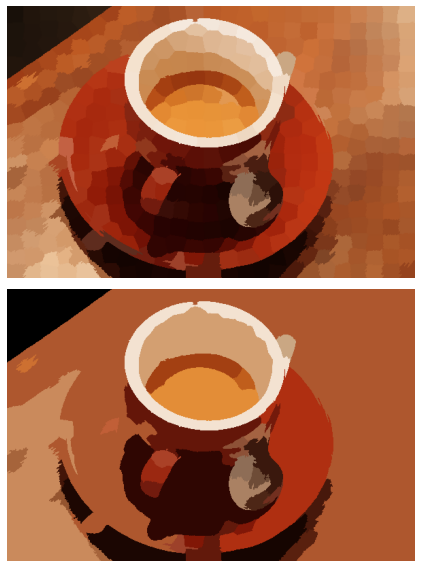

In [ ]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1)
labels2 = graph.cut_threshold(labels1, g, 29)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                       figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()